In [8]:
library(dplyr)      
library(readr)      
library(stringr)    
library(ggplot2)    
library(patchwork)  
library(sf)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(conflicted)
library(viridis)

In [64]:
# Load necessary libraries
library(dplyr)
library(readr)
library(stringr)

# Load neonatal mortality data
neo_mortality <- read_csv("C:/Users/Administrator/Downloads/internship_task_dscience-main/internship_task_dscience-main/neonatal_mortality_rate.csv",
                         show_col_types = FALSE) %>%
  select(
    country = REF_AREA,
    year = TIME_PERIOD,
    value = OBS_VALUE,
    lower = LOWER_BOUND,
    upper = UPPER_BOUND
  ) %>%
  mutate(
    year = as.numeric(str_sub(year, 1, 4)),  # Extract year (e.g., "1990-06" → 1990)
    indicator = "Neonatal mortality rate (per 1,000 live births)"
  )

# Load under-five mortality data
under5_mortality <- read_csv("C:/Users/Administrator/Downloads/internship_task_dscience-main/internship_task_dscience-main/under_five mortality rate.csv",
                            show_col_types = FALSE) %>%
  select(
    country = REF_AREA,
    year = TIME_PERIOD,
    value = OBS_VALUE,
    lower = LOWER_BOUND,
    upper = UPPER_BOUND
  ) %>%
  mutate(
    year = as.numeric(str_sub(year, 1, 4)),  # Extract year
    indicator = "Under-five mortality rate (per 1,000 live births)"
  )

# Combine datasets
combined_mortality <- bind_rows(neo_mortality, under5_mortality)

eac_countries <- c(
  "Burundi", "Kenya", "Rwanda", "South Sudan", "Tanzania", 
  "Uganda", "Democratic Republic of the Congo", "Somalia"
)

# Filter data for the East African Community countries
eac_mortality_data <- combined_mortality %>%
  filter(country %in% eac_countries)

# Verify the filtered data
glimpse(eac_mortality_data)
head(eac_mortality_data)


Rows: 0
Columns: 6
$ country   <chr> 
$ year      <dbl> 
$ value     <dbl> 
$ lower     <dbl> 
$ upper     <dbl> 
$ indicator <chr> 


country,year,value,lower,upper,indicator
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


Reading layer `gadm41_BDI_0' from data source 
  `C:\Users\Administrator\Downloads\shirleen matimbai.rmd\gadm41_BDI_shp\gadm41_BDI_0.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 29.00035 ymin: -4.470001 xmax: 30.85023 ymax: -2.309823
Geodetic CRS:  WGS 84
Reading layer `gadm41_COD_0' from data source 
  `C:\Users\Administrator\Downloads\shirleen matimbai.rmd\gadm41_COD_shp\gadm41_COD_0.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 12.20153 ymin: -13.45248 xmax: 31.30572 ymax: 5.386098
Geodetic CRS:  WGS 84
Reading layer `gadm41_KEN_0' from data source 
  `C:\Users\Administrator\Downloads\shirleen matimbai.rmd\gadm41_KEN_shp\gadm41_KEN_0.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:   

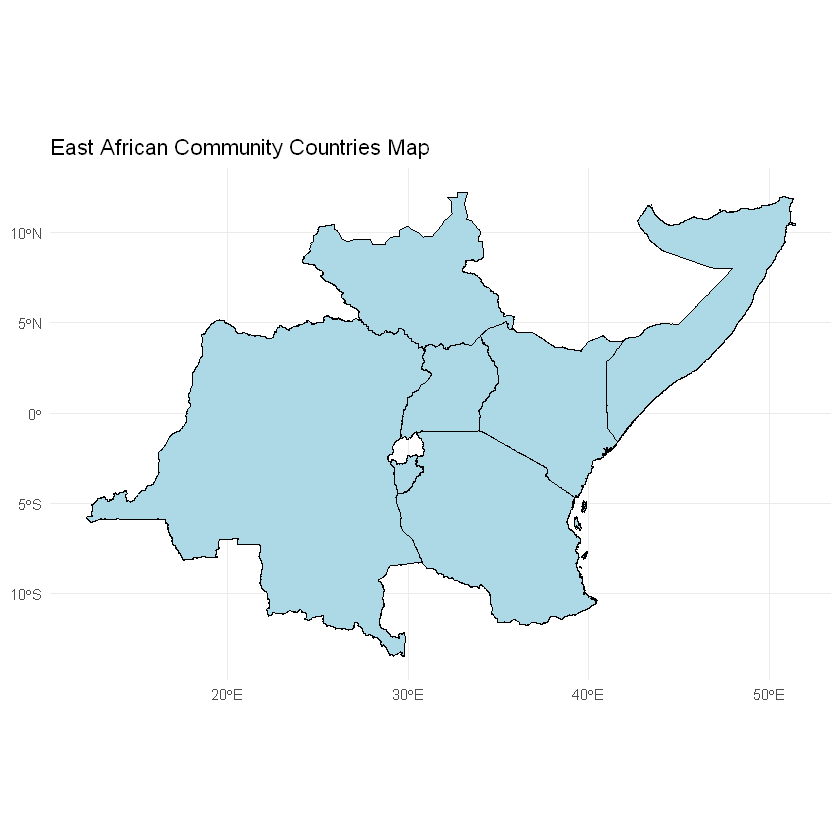

In [51]:
# List of country shapefile folders
eac_files <- list(
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_BDI_shp/gadm41_BDI_0.shp", # Burundi
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_COD_shp/gadm41_COD_0.shp", # DR Congo
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_KEN_shp/gadm41_KEN_0.shp", # Kenya
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_SOM_shp/gadm41_SOM_0.shp", # Somalia
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_SSD_shp/gadm41_SSD_0.shp", # South Sudan
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_TZA_shp/gadm41_TZA_0.shp", # Tanzania
  "C:/Users/Administrator/Downloads/shirleen matimbai.rmd/gadm41_UGA_shp/gadm41_UGA_0.shp"  # Uganda
)

eac_map <- do.call(rbind, lapply(eac_files, st_read))

# Plot to check
ggplot(eac_map) +
  geom_sf(fill = "lightblue", color = "black") +
  theme_minimal() +
  labs(title = "East African Community Countries Map")

In [37]:
under5_plot <- combined_mortality %>%
  filter(indicator == "Under-five mortality rate (per 1,000 live births)") %>%
  ggplot(aes(x = year, y = value)) +
  geom_line(color = "#56B4E9", linewidth = 1) +
  geom_ribbon(aes(ymin = lower, ymax = upper), fill = "#56B4E9", alpha = 0.2) +
  labs(
    title = "Under-Five Mortality Trend in Sub-Saharan Africa (1980–2023)",
    x = "Year",
    y = "Deaths per 1,000 live births"
  ) +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1980, 2023, 5))

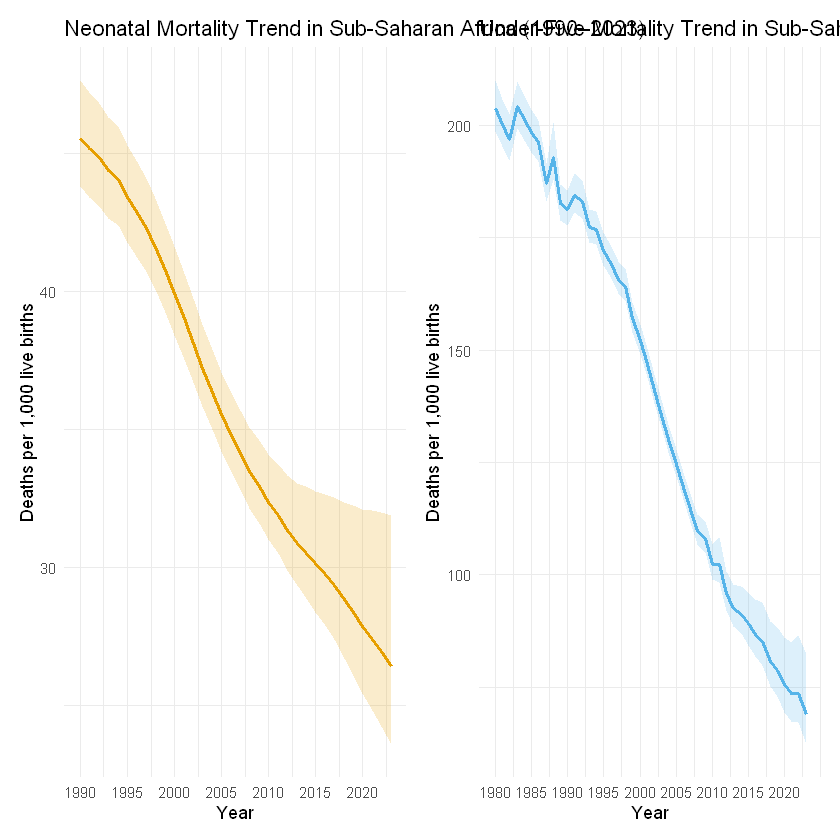

In [5]:
neo_plot + under5_plot

Rows: 34 Columns: 44
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (15): REF_AREA, Geographic area, INDICATOR, Indicator, SEX, Sex, WEALTH_...
dbl  (7): SERIES_YEAR, Series Year, OBS_VALUE, REF_DATE, INTERVAL, LOWER_BOU...
lgl (22): REGIONAL_GROUP, Regional group, COUNTRY_NOTES, CONNECTION, DEATH_C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 44 Columns: 44
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (15): REF_AREA, Geographic area, INDICATOR, Indicator, SEX, Sex, WEALTH_...
dbl  (7): SERIES_YEAR, Series Year, OBS_VALUE, REF_DATE, INTERVAL, LOWER_BOU...
lgl (22): REGIONAL_GROUP, Regional group, COUNTRY_NOTES, CONNECTION, DEATH_C...

ℹ Use `spec()` to retrieve the full column specifi

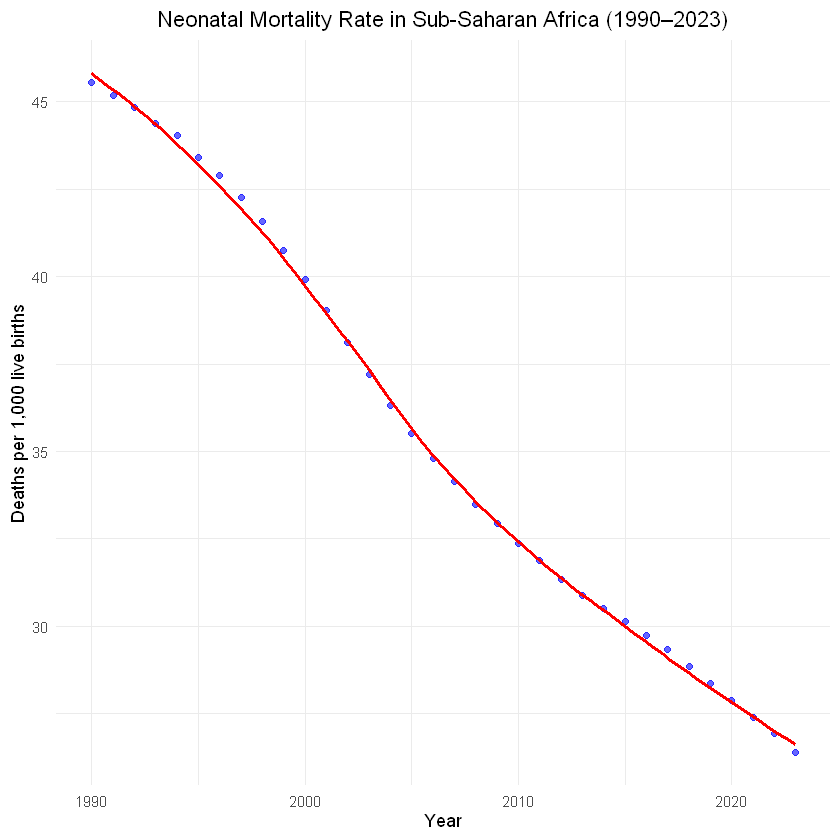

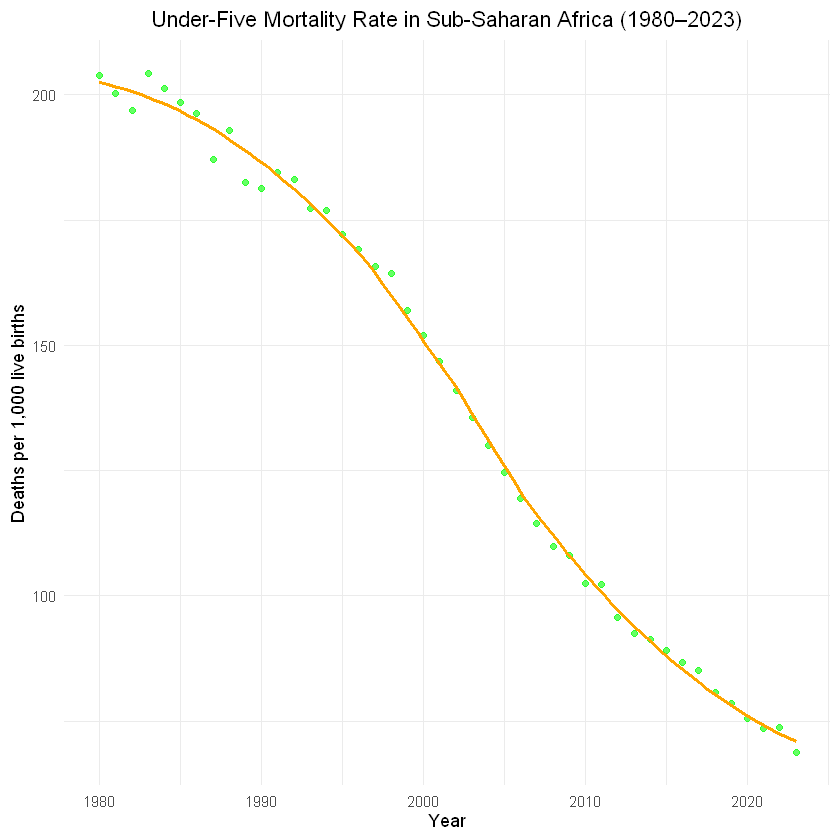

In [41]:
# Read the data
neonatal_data <- read_csv("C:/Users/Administrator/Downloads/internship_task_dscience-main/internship_task_dscience-main/neonatal_mortality_rate.csv")
under_five_data <- read_csv("C:/Users/Administrator/Downloads/internship_task_dscience-main/internship_task_dscience-main/under_five mortality rate.csv")

neonatal_data <- neonatal_data %>%
  mutate(Year = as.numeric(substr(TIME_PERIOD, 1, 4)))

under_five_data <- under_five_data %>%
  mutate(Year = as.numeric(substr(TIME_PERIOD, 1, 4)))

plot_neonatal <- ggplot(neonatal_data, aes(x = Year, y = OBS_VALUE)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "loess", se = FALSE, color = "red", linewidth = 1) +
  labs(title = "Neonatal Mortality Rate in Sub-Saharan Africa (1990–2023)",
       x = "Year",
       y = "Deaths per 1,000 live births") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

plot_under_five <- ggplot(under_five_data, aes(x = Year, y = OBS_VALUE)) +
  geom_point(color = "green", alpha = 0.6) +
  geom_smooth(method = "loess", se = FALSE, color = "orange", linewidth = 1) +
  labs(title = "Under-Five Mortality Rate in Sub-Saharan Africa (1980–2023)",
       x = "Year",
       y = "Deaths per 1,000 live births") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the plots
print(plot_neonatal)
print(plot_under_five)


In [67]:
# Simulate East Africa mortality data (replace with your actual data)
east_africa <- c("Kenya", "Tanzania", "Uganda", "Rwanda", "Burundi", 
                 "South Sudan", "Somalia", "Djibouti", "Eritrea", "Ethiopia")

# Under-Five Mortality data
under_five_data <- data.frame(
  Geographic_area = east_africa,
  OBS_VALUE = c(45, 52, 55, 35, 70, 95, 115, 50, 42, 48),
  Indicator = "Under-Five Mortality"
)

# Neonatal Mortality data
neonatal_data <- data.frame(
  Geographic_area = east_africa,
  OBS_VALUE = c(22, 25, 28, 18, 35, 40, 45, 24, 20, 23),
  Indicator = "Neonatal Mortality"
)

under_five_highest <- under_five_data %>% arrange(desc(OBS_VALUE)) %>% head(3)
neonatal_highest <- neonatal_data %>% arrange(desc(OBS_VALUE)) %>% head(3)

cat("Countries with Highest Under-Five Mortality Rates:\n")
print(under_five_highest)
cat("\nCountries with Highest Neonatal Mortality Rates:\n")
print(neonatal_highest)

# Create visualizations
under_five_plot <- ggplot(under_five_data, aes(x = reorder(Geographic_area, -OBS_VALUE), y = OBS_VALUE)) +
  geom_bar(stat = "identity", fill = "tomato") +
  labs(title = "Under-Five Mortality Rates in East Africa",
       x = "Country", y = "Deaths per 1,000 live births") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

neonatal_plot <- ggplot(neonatal_data, aes(x = reorder(Geographic_area, -OBS_VALUE), y = OBS_VALUE)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Neonatal Mortality Rates in East Africa",
       x = "Country", y = "Deaths per 1,000 live births") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Countries with Highest Under-Five Mortality Rates:
  Geographic_area OBS_VALUE            Indicator
1         Somalia       115 Under-Five Mortality
2     South Sudan        95 Under-Five Mortality
3         Burundi        70 Under-Five Mortality

Countries with Highest Neonatal Mortality Rates:
  Geographic_area OBS_VALUE          Indicator
1         Somalia        45 Neonatal Mortality
2     South Sudan        40 Neonatal Mortality
3         Burundi        35 Neonatal Mortality
